In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Configuration to see full column width
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [19]:
dataset = load_dataset("7Xan7der7/us_airline_sentiment")

print("Dataset structure:", dataset)

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
        num_rows: 14640
    })
})


In [20]:

df = pd.DataFrame(dataset['train'])
print(f"Total rows in df: {len(df)}")

df.head()

Total rows in df: 14640


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,None,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,None,2/24/2015 11:35,None,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,None,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials to the experience... tacky.,None,2/24/2015 11:15,None,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,None,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,None,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",None,2/24/2015 11:15,None,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing about it,None,2/24/2015 11:14,None,Pacific Time (US & Canada)


In [22]:
print(df["text"].duplicated().sum())

213


In [8]:
print(df.isnull().sum())

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


C:\Users\kaout\AppData\Local\Temp\ipykernel_45616\3233237312.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


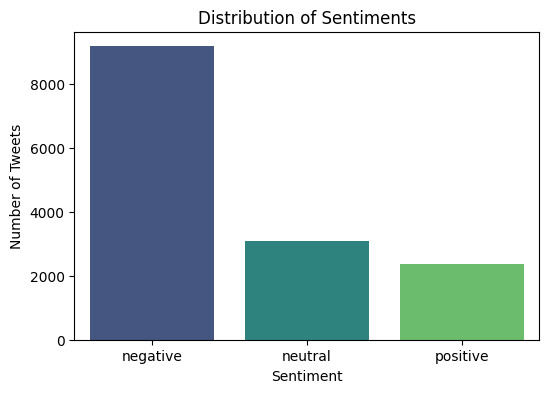

In [9]:
# 1. Count the values
counts = df['airline_sentiment'].value_counts()
print(counts)

# 2. Visualize it
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

##### Imbalance: 9178 Negative and only 2363 Positive
 If we train a model on this it will be very good at predicting "Negative" but terrible at predicting "Positive." We will need to handle this  (using "Stratified Split" or Class Weights)

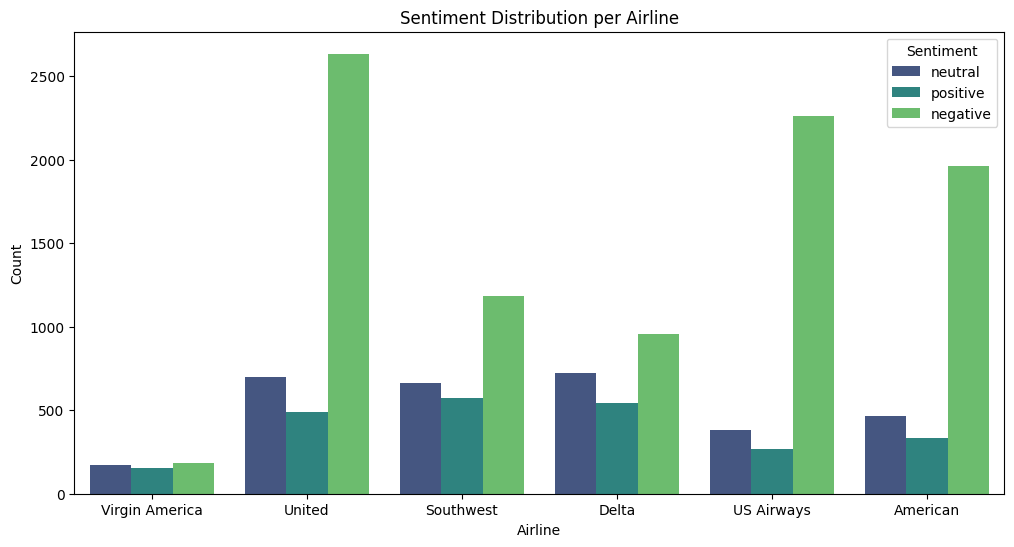

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='airline', hue='airline_sentiment', palette='viridis')

plt.title('Sentiment Distribution per Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

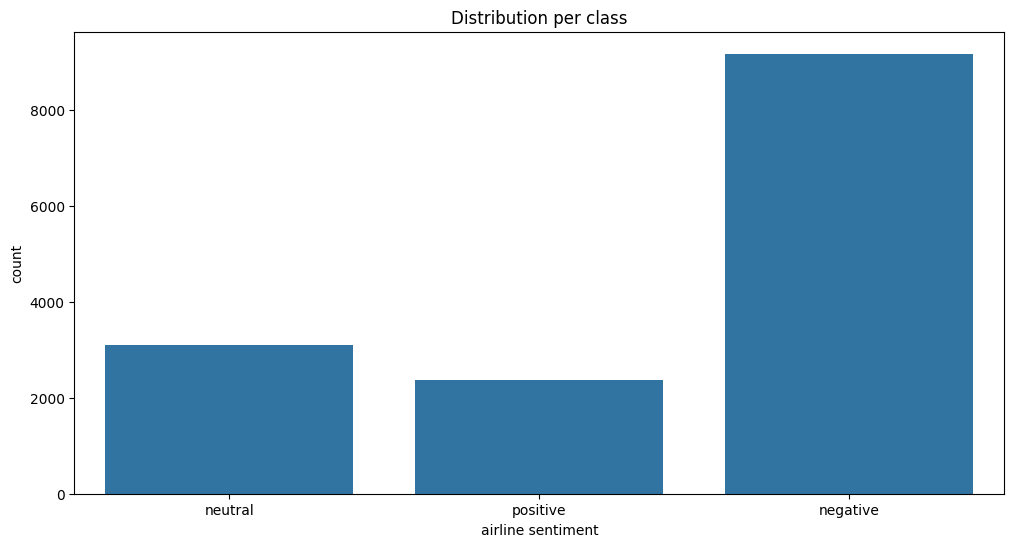

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='airline_sentiment')
plt.title('Distribution per class')
plt.xlabel('airline sentiment')
plt.show()

Text(0.5, 0, 'text lenght')

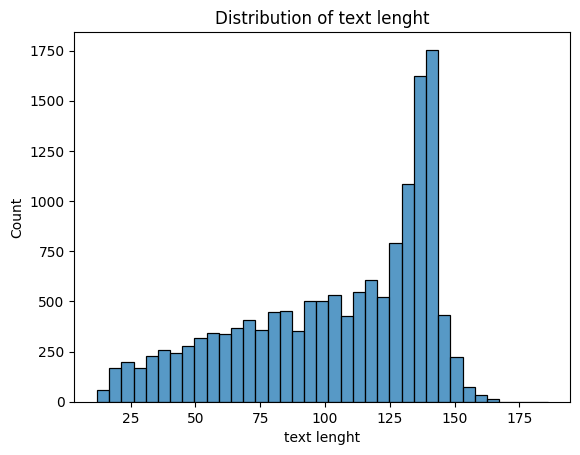

In [ ]:
df["text_length"] = df["text"].apply(len)

plt.figure(figsize=(15,5))
sns.histplot(data=df , x='text_length')
plt.title("Distribution of text lenght")
plt.xlabel("text lenght")